In [14]:
import numpy
import matplotlib.pyplot as plt

In [15]:
def solow_function(k, lam=0.1, mu=0.01, s=0.4, alpha=0.3, a_big=1):
    return -(lam + mu)*k + s*a_big*k**alpha

In [34]:
lam=0.01
mu=0.01
s=0.4
alpha=0.3
a_big=1

In [35]:
def euler(iterations, initial, step, lam=0.01, mu=0.01, s=0.4, alpha=0.3, a_big=1):
    k_val = [initial]
    t_val = [0]
    for i in range(iterations):
        new_k = k_val[-1] + step*solow_function(k_val[-1], lam, mu, s, alpha, a_big)
        k_val.append(new_k)
        t_val.append(t_val[-1] + step)
    return t_val, k_val

In [44]:
iterations = 500
initial = 3
step = 1

In [45]:
result = euler(iterations, initial, step)
t_list_e = result[0]
k_list_e = result[1]

In [53]:
initial1 = 150
result1 = euler(iterations, initial1, step)
t_list_e1 = result1[0]
k_list_e1 = result1[1]

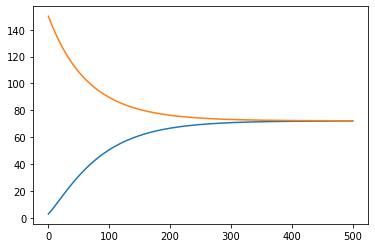

In [54]:
plt.plot(t_list_e, k_list_e)
plt.plot(t_list_e1, k_list_e1)

In [55]:
def runge_kutta(iterations, initial, step, lam=0.01, mu=0.01, s=0.4, alpha=0.3, a_big=1):
    k_val = [initial]
    t_val = [0]
    for i in range(iterations):
        k1 = solow_function(k_val[-1], lam, mu, s, alpha, a_big)
        k2 = solow_function(k_val[-1]+step*k1/2, lam, mu, s, alpha, a_big)
        k3 = solow_function(k_val[-1]+step*k2/2, lam, mu, s, alpha, a_big)
        k4 = solow_function(k_val[-1]+step*k3, lam, mu, s, alpha, a_big)
        k_val.append(k_val[-1]+step*(k1+2*k2+2*k3+k4)/6)
        t_val.append(t_val[-1] + step)
    return t_val, k_val

In [56]:
result_rk = runge_kutta(iterations, initial, step)
t_list_rk = result_rk[0]
k_list_rk = result_rk[1]

In [57]:
result_rk1 = runge_kutta(iterations, initial1, step)
t_list_rk1 = result_rk1[0]
k_list_rk1 = result_rk1[1]

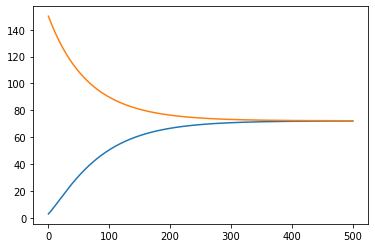

In [58]:
plt.plot(t_list_rk, k_list_rk)
plt.plot(t_list_rk1, k_list_rk1)

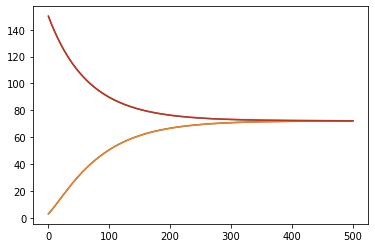

In [59]:
plt.plot(t_list_e, k_list_e)
plt.plot(t_list_rk, k_list_rk)
plt.plot(t_list_e1, k_list_e1)
plt.plot(t_list_rk1, k_list_rk1)